In [1]:
import pandas as pd
import yaml
import sys, os

# Inserta la carpeta padre de 'notebooks' en sys.path
root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if root not in sys.path:
    sys.path.insert(0, root)

from src.inventory.simulation import simulate_inventory

# Rutas absolutas basadas en root
config_path = os.path.join(root, "config", "config.yaml")
skus_path   = os.path.join(root, "data", "raw", "skus.csv")

# 1) Carga config
with open(config_path, "r") as f:
    cfg = yaml.safe_load(f)

# 2) Carga SKUs
df_skus = pd.read_csv(skus_path)

# 3) Simula
df_sim = simulate_inventory(
    df_skus=df_skus,
    analysis_days=cfg["analysis_period_days"]
)

# 4) Muestra un vistazo
df_sim.head(10)


,date,sku_id,stock_level
0,2025-07-27,SKU0001,210
1,2025-07-27,SKU0002,207
2,2025-07-27,SKU0003,71
3,2025-07-27,SKU0004,75
4,2025-07-27,SKU0005,17
5,2025-07-27,SKU0006,0
6,2025-07-27,SKU0007,73
7,2025-07-27,SKU0008,254
8,2025-07-27,SKU0009,22
9,2025-07-27,SKU0010,293


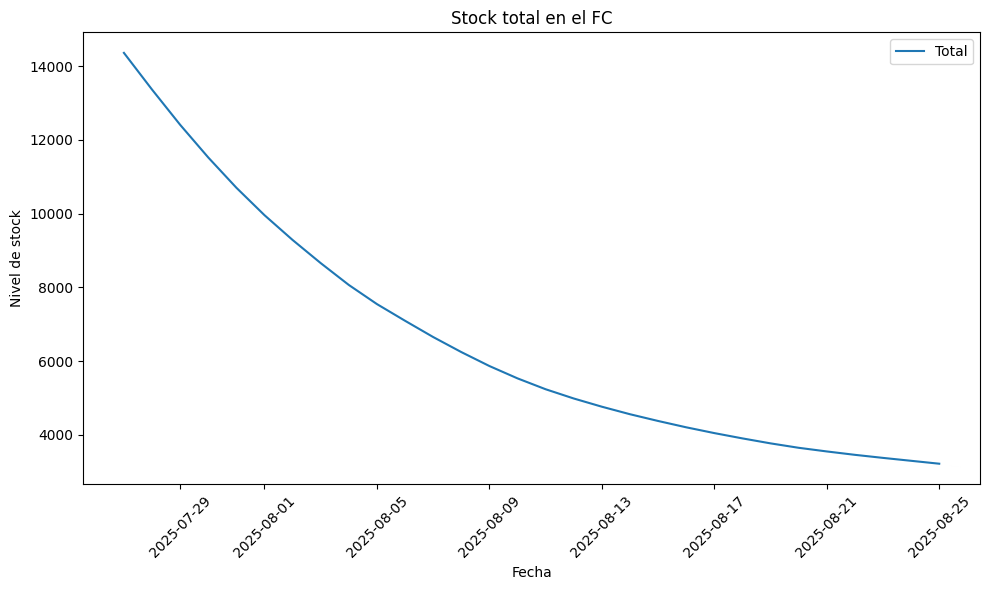

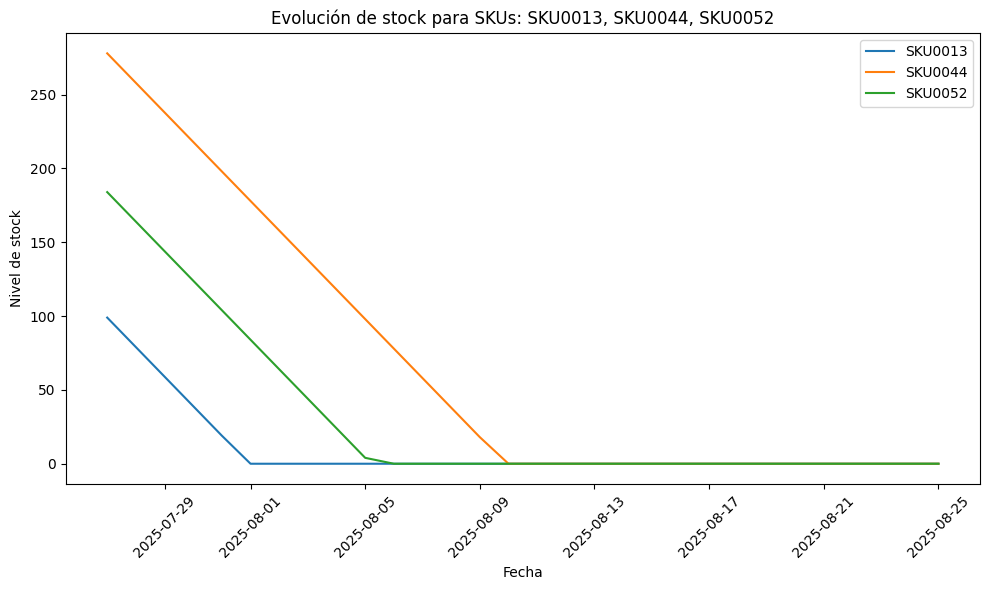

In [4]:
import matplotlib.pyplot as plt

# 1) Stock total en el FC
df_agg = df_sim.groupby('date')['stock_level'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_agg['date'], df_agg['stock_level'], label='Total')
plt.title('Stock total en el FC')
plt.xlabel('Fecha')
plt.ylabel('Nivel de stock')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 2) Evolución de los 3 SKUs con mayor rotación
top3 = df_skus.nlargest(3, 'avg_daily_sales')['sku_id'].tolist()

plt.figure(figsize=(10, 6))
for sku in top3:
    df_sku = df_sim[df_sim['sku_id'] == sku]
    plt.plot(df_sku['date'], df_sku['stock_level'], label=sku)
plt.title(f'Evolución de stock para SKUs: {", ".join(top3)}')
plt.xlabel('Fecha')
plt.ylabel('Nivel de stock')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
